Hebani Duggal hd288 
Problem Set 3 

In [ ]:
Probelem 4 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
import re
import numpy as np
from collections import Counter,defaultdict

In [10]:
ptexts=[open('ps2data/p{}.txt'.format(i)).read() for i in range(30)]
stexts=[open('ps2data/s{}.txt'.format(i)).read() for i in range(30)]
ttexts=[open('ps2data/t{}.txt'.format(i)).read() for i in range(10)]

In [11]:
names=['Trump', 'Obama', 'Republican', 'House', 'Court', 'Senate', 'Muslim', 'Constitution', 'Democratic',
       'Congress', 'Bush', 'Bannon', 'Clinton', 'Cabinet', 'Supreme', 'Garland', 'Scalia', 'Gorsuch',
       'American', 'Twitter',
       'League', 'Chicago', 'Cubs', 'Patriots', 'Olympic', 'Yankees', 'Football', 'Baseball']

In [12]:
import re
tset = re.findall("[a-z0-9']+",ttexts[0].lower())

In [13]:
numdoc= np.sum([Counter(set(tset)) for txt in ttexts])

In [14]:
tottexts = ptexts+stexts
numdoc= np.sum([Counter(set(re.findall("[a-z0-9']+",txt.lower()))) for txt in tottexts])
#print numdoc
for x in range(0,len(names)):
    names[x] = names[x].lower()
total = len(tottexts)
freq = []
prob = []
for i in names:
    freq.append(numdoc[i])
    prob.append(numdoc[i]/float(total))

print freq
print names
print prob


[29, 15, 15, 17, 19, 13, 13, 11, 13, 9, 8, 8, 7, 7, 12, 5, 5, 7, 28, 12, 16, 10, 8, 7, 6, 5, 11, 11]
['trump', 'obama', 'republican', 'house', 'court', 'senate', 'muslim', 'constitution', 'democratic', 'congress', 'bush', 'bannon', 'clinton', 'cabinet', 'supreme', 'garland', 'scalia', 'gorsuch', 'american', 'twitter', 'league', 'chicago', 'cubs', 'patriots', 'olympic', 'yankees', 'football', 'baseball']
[0.48333333333333334, 0.25, 0.25, 0.2833333333333333, 0.31666666666666665, 0.21666666666666667, 0.21666666666666667, 0.18333333333333332, 0.21666666666666667, 0.15, 0.13333333333333333, 0.13333333333333333, 0.11666666666666667, 0.11666666666666667, 0.2, 0.08333333333333333, 0.08333333333333333, 0.11666666666666667, 0.4666666666666667, 0.2, 0.26666666666666666, 0.16666666666666666, 0.13333333333333333, 0.11666666666666667, 0.1, 0.08333333333333333, 0.18333333333333332, 0.18333333333333332]


In [15]:
CoOccurMatrix = [[0 for x in range(len(names))] for y in range(len(names))]
JointProbMatrix = [[0 for x in range(len(names))] for y in range(len(names))]
ProdMatrix = [[0 for x in range(len(names))] for y in range(len(names))]
CorrelMatrix = [[0 for x in range(len(names))] for y in range(len(names))]

for i in range(len(names)):
    for j in range(len(names)):
        for txt in tottexts:
            if (names[i] in re.findall("[a-z0-9']+",txt.lower())) & (names[j] in re.findall("[a-z0-9']+",txt.lower())):
                CoOccurMatrix[i][j] += 1
        JointProbMatrix[i][j] = CoOccurMatrix[i][j]/float(len(tottexts))
        ProdMatrix[i][j] = prob[i]*prob[j]
        if JointProbMatrix[i][j] == ProdMatrix[i][j]:
            CorrelMatrix[i][j] = 0
            print[names[i],prob[i],names[j],prob[j],JointProbMatrix[i][j],ProdMatrix[i][j]]
        elif JointProbMatrix[i][j] > ProdMatrix[i][j]:
            CorrelMatrix[i][j] = 1
        else:
            CorrelMatrix[i][j] = -1

#print CorrelMatrix
#print ProdMatrix
#print JointProbMatrix


['garland', 0.08333333333333333, 'twitter', 0.2, 0.016666666666666666, 0.016666666666666666]
['scalia', 0.08333333333333333, 'twitter', 0.2, 0.016666666666666666, 0.016666666666666666]
['twitter', 0.2, 'garland', 0.08333333333333333, 0.016666666666666666, 0.016666666666666666]
['twitter', 0.2, 'scalia', 0.08333333333333333, 0.016666666666666666, 0.016666666666666666]


In [16]:
#print CoOccurMatrix
#print JointProbMatrix

4 Part A - A pair of words that are independent as 'garland' and 'twitter.' 

P('garland') = 0.08333333333333333
P('twitter') = 0.2
P('garland', 'twitter') = 0.016666666666666666

P('garland')*P('twitter') = P('garland', 'twitter') therefore the pair of words is independent. 

4 Part B 

In [17]:
from math import log
logMatrix = [[0 for x in range(len(names))] for y in range(len(names))]
for i in range(len(names)):
    for j in range(len(names)):
        current = JointProbMatrix[i][j]/ProdMatrix[i][j]
        if current == 0:
            current = .00001
        logMatrix[i][j] = log(current)
        
logMatrix

import matplotlib.pyplot as plt
%matplotlib inline

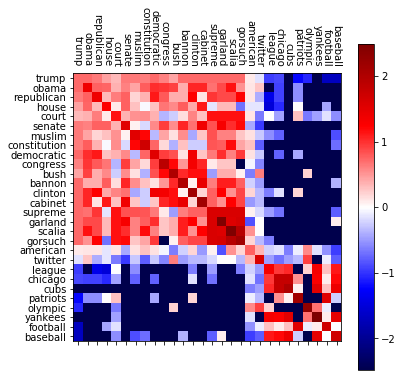

In [18]:
plt.figure(figsize = (6,6));
plt.cm.seismic.set_bad('k')  # renders -np.inf as black
plt.imshow(logMatrix,interpolation='none',cmap='seismic',vmin=-np.max(logMatrix))
plt.colorbar() #add colorbar at right
plt.gca().tick_params(labelbottom='off',labeltop='on') #label columns at top
plt.xticks(range(len(names)),names,rotation=270);
plt.yticks(range(len(names)),names);

5a. 

In [19]:
from mpl_toolkits.basemap import Basemap

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from ps3_tempdata import tempdata,alaska_temps

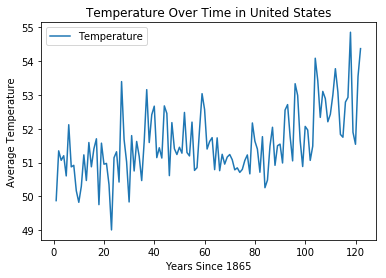

In [22]:
avgs = []

for i in range(len(tempdata["Alabama"])):
    current = 0
    for j in tempdata.keys():
        current += tempdata[j][i]
    avgs.append(current/len(tempdata.keys()))
x = range(1,123)
for i in range(len(x)):
    x[i] = float(x[i])
    


plt.plot(x,avgs)

plt.title('Temperature Over Time in United States')
plt.xlabel('Years Since 1865')
plt.ylabel('Average Temperature')
plt.legend(['Temperature']);



5b. 

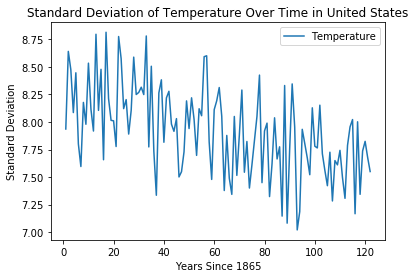

In [23]:
stdev = []

for i in range(len(tempdata["Alabama"])):
    current = []
    for j in tempdata.keys():
        current.append(tempdata[j][i])
    stdev.append(np.std(current))

plt.plot(x,stdev)

plt.title('Standard Deviation of Temperature Over Time in United States')
plt.xlabel('Years Since 1865')
plt.ylabel('Standard Deviation')
plt.legend(['Temperature']);

5b. The variability changing over the states seemed to have decreased over the past century. 

In [ ]:
5c. 

ValueError: Invalid RGBA argument: array([[ 0.38039216,  0.38039216,  1.        ,  1.        ],
       [ 1.        ,  0.92941176,  0.92941176,  1.        ],
       [ 0.14509804,  0.14509804,  1.        ,  1.        ],
       [ 0.5372549 ,  0.5372549 ,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.83803922,  1.        ],
       [ 0.30196078,  0.30196078,  1.        ,  1.        ],
       [ 1.        ,  0.14509804,  0.14509804,  1.        ],
       [ 0.        ,  0.        ,  0.72823529,  1.        ],
       [ 0.06666667,  0.06666667,  1.        ,  1.        ],
       [ 0.85098039,  0.85098039,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.83803922,  1.        ],
       [ 1.        ,  0.99215686,  0.99215686,  1.        ],
       [ 0.14509804,  0.14509804,  1.        ,  1.        ],
       [ 0.64901961,  0.        ,  0.        ,  1.        ],
       [ 0.22352941,  0.22352941,  1.        ,  1.        ],
       [ 0.69411765,  0.69411765,  1.        ,  1.        ],
       [ 1.        ,  0.85098039,  0.85098039,  1.        ],
       [ 0.        ,  0.        ,  0.83803922,  1.        ],
       [ 0.45882353,  0.45882353,  1.        ,  1.        ],
       [ 0.77254902,  0.77254902,  1.        ,  1.        ],
       [ 1.        ,  0.22352941,  0.22352941,  1.        ],
       [ 0.        ,  0.        ,  0.99176471,  1.        ],
       [ 1.        ,  0.06666667,  0.06666667,  1.        ],
       [ 0.06666667,  0.06666667,  1.        ,  1.        ],
       [ 0.5       ,  0.        ,  0.        ,  1.        ],
       [ 0.14509804,  0.14509804,  1.        ,  1.        ],
       [ 0.9627451 ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.69411765,  0.69411765,  1.        ],
       [ 0.80588235,  0.        ,  0.        ,  1.        ],
       [ 0.06666667,  0.06666667,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.50862745,  1.        ],
       [ 0.5       ,  0.        ,  0.        ,  1.        ],
       [ 0.5372549 ,  0.5372549 ,  1.        ,  1.        ],
       [ 0.76666667,  0.        ,  0.        ,  1.        ],
       [ 0.61568627,  0.61568627,  1.        ,  1.        ],
       [ 0.14509804,  0.14509804,  1.        ,  1.        ],
       [ 0.14509804,  0.14509804,  1.        ,  1.        ],
       [ 0.92941176,  0.92941176,  1.        ,  1.        ],
       [ 0.06666667,  0.06666667,  1.        ,  1.        ],
       [ 0.14509804,  0.14509804,  1.        ,  1.        ],
       [ 0.5372549 ,  0.5372549 ,  1.        ,  1.        ],
       [ 0.22352941,  0.22352941,  1.        ,  1.        ],
       [ 0.61568627,  0.61568627,  1.        ,  1.        ],
       [ 0.        ,  0.        ,  0.78313725,  1.        ],
       [ 0.5372549 ,  0.5372549 ,  1.        ,  1.        ],
       [ 0.85098039,  0.85098039,  1.        ,  1.        ],
       [ 0.61568627,  0.61568627,  1.        ,  1.        ],
       [ 0.38039216,  0.38039216,  1.        ,  1.        ]])

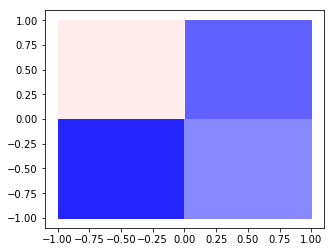

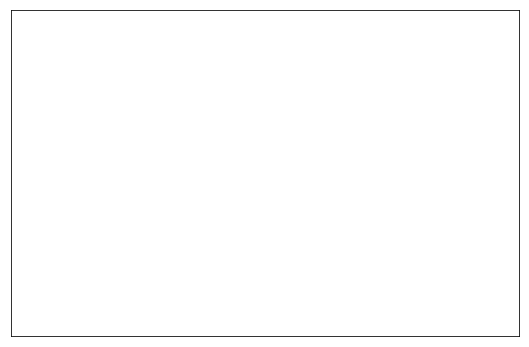

In [58]:
from mpl_toolkits.basemap import Basemap
from ps3_tempdata import tempdata,alaska_temps
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
mycmap = plt.cm.get_cmap('seismic')


tempchange1 = []
#print tempdata["Alabama"][121]

#difference in avg temps between 2011 and 2012
for j in tempdata.keys():
    tempchange1.append(tempdata[j][119] - tempdata[j][118])    

tempchange1=np.asarray(tempchange1)
    
r=max(abs(tempchange1))
#print (mycmap(.5 + vals*.5/r))
coords=((1,1),(-1,1),(-1,-1),(1,-1))

plt.figure(figsize=(5,4))
for clr,(i,j) in zip(mycmap(.5 + tempchange1*.5/r),coords):
    plt.fill(*zip((0,0),(i,0),(i,j),(0,j)),color=clr)

mycmap = mycmap(.5 + tempchange1*.5/r)


plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('geodata/st99_d90','states',drawbounds=True,color='w')
for polygon,info in zip(m.states,m.states_info):
  state=info['NAME']
  if state in ('Alaska','Hawaii'): continue  #only lower 48
  xdata,ydata = zip(*polygon)
  #  #b3b3b3' is rgb=(179,179,179) gray, '#be2626' is rgb=(190,38,38) red
  brcolor = '#b3b3b3' if state in nolottery else '#be2626'
  plt.fill(xdata,ydata,color=mycmap,edgecolor='darkgrey')
